In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [7]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/30reps_1week_People")

In [8]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]


In [10]:
numitems = len(user_filenames)
print(numitems)

30


In [13]:
df_total = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total.append(temp_f)

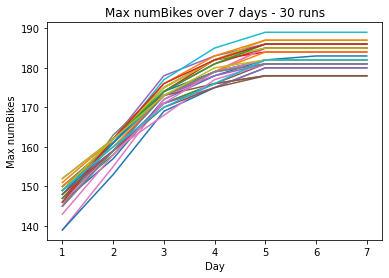

In [24]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days - 30 runs')

# Step 6: Display the plot
plt.show()


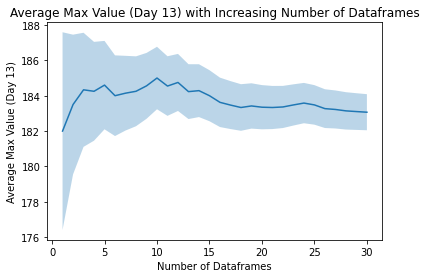

In [30]:

# Step 1: Create an empty list to store the maximum values
max_values_day_13 = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for df in df_total:
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)

# Step 3: Calculate the cumulative average
avg_values = np.cumsum(max_values_day_13) / np.arange(1, len(max_values_day_13) + 1)

# Step 4: Calculate the 95% confidence interval
std_values = np.std(max_values_day_13)
ci_lower = avg_values - 1.96 * std_values / np.sqrt(np.arange(1, len(max_values_day_13) + 1))
ci_upper = avg_values + 1.96 * std_values / np.sqrt(np.arange(1, len(max_values_day_13) + 1))

# Step 5: Create the plot
plt.plot(range(1, len(max_values_day_13) + 1), avg_values, label='Average')
plt.fill_between(range(1, len(max_values_day_13) + 1), ci_lower, ci_upper, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have a list of dataframes called 'dataframes'

# Step 1: Create an empty list to store the maximum values
max_values_day_13 = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for df in df_total:
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)

# Step 3: Calculate the cumulative average
avg_values = np.cumsum(max_values_day_13) / np.arange(1, len(max_values_day_13) + 1)

# Step 4: Calculate the 95% confidence interval
std_values = np.std(max_values_day_13)
ci_lower = avg_values - 1.96 * std_values / np.sqrt(np.arange(1, len(max_values_day_13) + 1))
ci_upper = avg_values + 1.96 * std_values / np.sqrt(np.arange(1, len(max_values_day_13) + 1))

# Step 5: Calculate the delta of the confidence interval
ci_delta = ci_upper - ci_lower

# Step 6: Create a DataFrame with the data
df_data = pd.DataFrame({
    'Number of Dataframes': range(1, len(max_values_day_13) + 1),
    'Average': avg_values,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper,
    'CI Delta': ci_delta
})

# Display the DataFrame
print(df_data)


    Number of Dataframes     Average    CI Lower    CI Upper   CI Delta
0                      1  182.000000  176.411804  187.588196  11.176393
1                      2  183.500000  179.548548  187.451452   7.902903
2                      3  184.333333  181.106987  187.559680   6.452693
3                      4  184.250000  181.455902  187.044098   5.588196
4                      5  184.600000  182.100883  187.099117   4.998235
5                      6  184.000000  181.718628  186.281372   4.562743
6                      7  184.142857  182.030717  186.254997   4.224279
7                      8  184.250000  182.274274  186.225726   3.951452
8                      9  184.555556  182.692823  186.418288   3.725464
9                     10  185.000000  183.232857  186.767143   3.534286
10                    11  184.545455  182.860550  186.230359   3.369809
11                    12  184.750000  183.136827  186.363173   3.226347
12                    13  184.230769  182.680882  185.780656   3

In [34]:
# Step 1: Create an empty list to store the maximum values
max_values_day_13 = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for df in df_total:
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)

# Step 3: Calculate the standard deviation
std_values = np.std(max_values_day_13, ddof=1)  # Use ddof=1 for sample standard deviation

# Step 4: Create the x-axis values
x_values = range(1, len(max_values_day_13) + 1)

# Step 5: Create the plot
plt.plot(x_values, std_values * np.ones_like(x_values))
plt.xlabel('Number of Dataframes')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation with Increasing Number of Dataframes')
plt.show()


NameError: name 'dataframes' is not defined